# Step-01 Load Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')


# Step-02 Load Dataset

In [2]:
df_train = pd.read_csv('train.csv')
display(df_train.head())
print("Shape of Training Data: ", df_train.shape)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


Shape of Training Data:  (750000, 12)


In [3]:
df_test = pd.read_csv('test.csv')
display(df_test.head())
print("Shape of Testing Data:", df_test.shape)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


Shape of Testing Data: (250000, 11)


# Step-03 Data Preprocesssing

* **Let's check information about data**

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


* **Let's check null values in percentage**

In [7]:
df_train.isnull().sum()/len(df_train)*100

id                              0.000000
Podcast_Name                    0.000000
Episode_Title                   0.000000
Episode_Length_minutes         11.612400
Genre                           0.000000
Host_Popularity_percentage      0.000000
Publication_Day                 0.000000
Publication_Time                0.000000
Guest_Popularity_percentage    19.470667
Number_of_Ads                   0.000133
Episode_Sentiment               0.000000
Listening_Time_minutes          0.000000
dtype: float64

In [8]:
df_test.isnull().sum()/len(df_test)*100

id                              0.0000
Podcast_Name                    0.0000
Episode_Title                   0.0000
Episode_Length_minutes         11.4944
Genre                           0.0000
Host_Popularity_percentage      0.0000
Publication_Day                 0.0000
Publication_Time                0.0000
Guest_Popularity_percentage    19.5328
Number_of_Ads                   0.0000
Episode_Sentiment               0.0000
dtype: float64

* **Let's impute NULL values**

In [9]:
df_train['Episode_Length_minutes'].fillna(df_train['Episode_Length_minutes'].mean(),inplace=True)
df_train['Guest_Popularity_percentage'].fillna(df_train['Guest_Popularity_percentage'].mean(),inplace=True)
df_train['Number_of_Ads'].fillna(df_train['Number_of_Ads'].mode()[0],inplace = True)

In [10]:
df_test['Episode_Length_minutes'].fillna(df_test['Episode_Length_minutes'].mean(),inplace=True)
df_test['Guest_Popularity_percentage'].fillna(df_test['Guest_Popularity_percentage'].mean(),inplace=True)

In [11]:
df_train.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [12]:
df_test.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
dtype: int64

* **Let's Check value counts**

In [13]:
display(df_train['Podcast_Name'].value_counts())

df_train.groupby('Podcast_Name').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

Podcast_Name
Tech Talks             22847
Sports Weekly          20053
Funny Folks            19635
Tech Trends            19549
Fitness First          19488
Business Insights      19480
Style Guide            19364
Game Day               19272
Melody Mix             18889
Criminal Minds         17735
Finance Focus          17628
Detective Diaries      17452
Crime Chronicles       17374
Athlete's Arena        17327
Fashion Forward        17280
Tune Time              17254
Business Briefs        17012
Lifestyle Lounge       16661
True Crime Stories     16373
Sports Central         16191
Digital Digest         16171
Humor Hub              16144
Mystery Matters        16002
Comedy Corner          15927
Joke Junction          15074
Wellness Wave          15009
Sport Spot             14778
Gadget Geek            14770
Home & Living          14686
Laugh Line             14673
Life Lessons           14464
World Watch            14043
Sound Waves            13928
Global News            13649
M

,Podcast_Name,counts
42,Tech Talks,22847
39,Sports Weekly,20053
15,Funny Folks,19635
43,Tech Trends,19549
14,Fitness First,19488
3,Business Insights,19480
41,Style Guide,19364
17,Game Day,19272
30,Melody Mix,18889
6,Criminal Minds,17735


In [14]:
df_train.groupby(['Genre','Podcast_Name']).size()

Genre       Podcast_Name      
Business    Athlete's Arena           4
            Business Briefs       17004
            Business Insights     19471
            Crime Chronicles          1
            Criminal Minds            4
                                  ...  
True Crime  Tech Trends               4
            True Crime Stories    16361
            Tune Time                 4
            Wellness Wave            15
            World Watch              10
Length: 407, dtype: int64

## Step-03 (b) Data Encoding

| Column             | Why Encode?                                           |
|--------------------|-------------------------------------------------------|
| Podcast_Name       | Categorical (48 unique podcasts)                      |
| Episode_Title      | Likely unnecessary — 100 unique values (can drop)     |
| Genre              | Categorical (10 types like Comedy, Health, etc.)      |
| Publication_Day    | Day names like Monday–Sunday (7 total)                |
| Publication_Time   | Categories like Morning, Evening (4 total)            |
| Episode_Sentiment  | Text labels like Positive, Negative (3 total)         |


**Let's Drop Podcast_Name and Episode_Title**

- It’s just an identifier for the show, not related to the target.
- It has too many unique values (48 unique names = high cardinality).
- It’s not interpretable or adds noise to the model.
- One-hot encoding would create 48 columns, which may overfit or slow down training.

In [15]:
df_train_clean = df_train.copy() # Remove this code when perform Outliers detection and removal

In [16]:
df_train_clean.drop(['Episode_Title'], axis = 1, inplace = True)
df_test.drop(['Episode_Title'], axis = 1 , inplace = True)

df_train_clean =df_train_clean.drop(['Podcast_Name'],axis=1)
df_test = df_test.drop(['Podcast_Name'], axis=1)

In [17]:
df_train_clean.head()

,id,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,64.504738,True Crime,74.81,Thursday,Night,52.236449,0.0,Positive,31.41998
1,1,119.800000,Comedy,66.95,Saturday,Afternoon,75.950000,2.0,Negative,88.01241
2,2,73.900000,Education,69.97,Tuesday,Evening,8.970000,0.0,Negative,44.92531
3,3,67.170000,Technology,57.22,Monday,Morning,78.700000,2.0,Positive,46.27824
4,4,110.510000,Health,80.07,Monday,Afternoon,58.680000,3.0,Neutral,75.61031


* **Let's do One Hot Encoding**

In [19]:
df_train_clean = pd.get_dummies(df_train_clean,columns=['Genre','Publication_Day','Publication_Time','Episode_Sentiment'])
df_test = pd.get_dummies(df_test, columns=['Genre','Publication_Day','Publication_Time','Episode_Sentiment'])

In [20]:
df_train_clean.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0,64.504738,74.81,52.236449,0.0,31.41998,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1,1,119.800000,66.95,75.950000,2.0,88.01241,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,2,73.900000,69.97,8.970000,0.0,44.92531,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
3,3,67.170000,57.22,78.700000,2.0,46.27824,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,4,110.510000,80.07,58.680000,3.0,75.61031,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [21]:
df_test.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,750000,78.96,38.11,53.330000,1.0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,750001,27.87,71.29,52.192796,0.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,750002,69.10,67.89,97.510000,0.0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,750003,115.39,23.40,51.750000,2.0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,750004,72.32,58.10,11.300000,2.0,False,False,False,False,True,...,False,False,True,False,False,True,False,False,True,False


# Step-04 Data Visualization

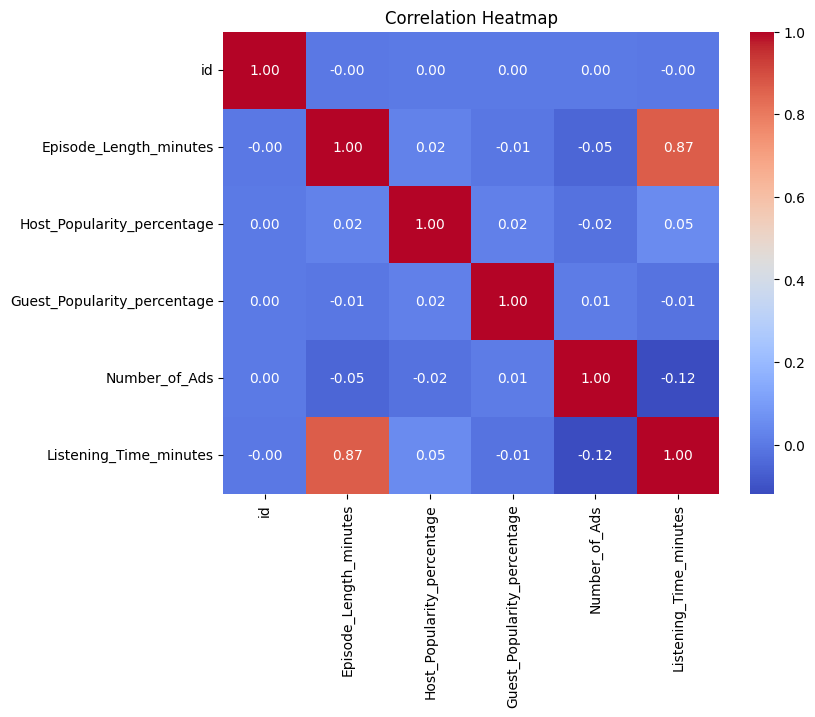

In [26]:
import matplotlib.pyplot as plt

# Pairwise correlations of numeric features
plt.figure(figsize=(8,6))
corr = df_train_clean.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

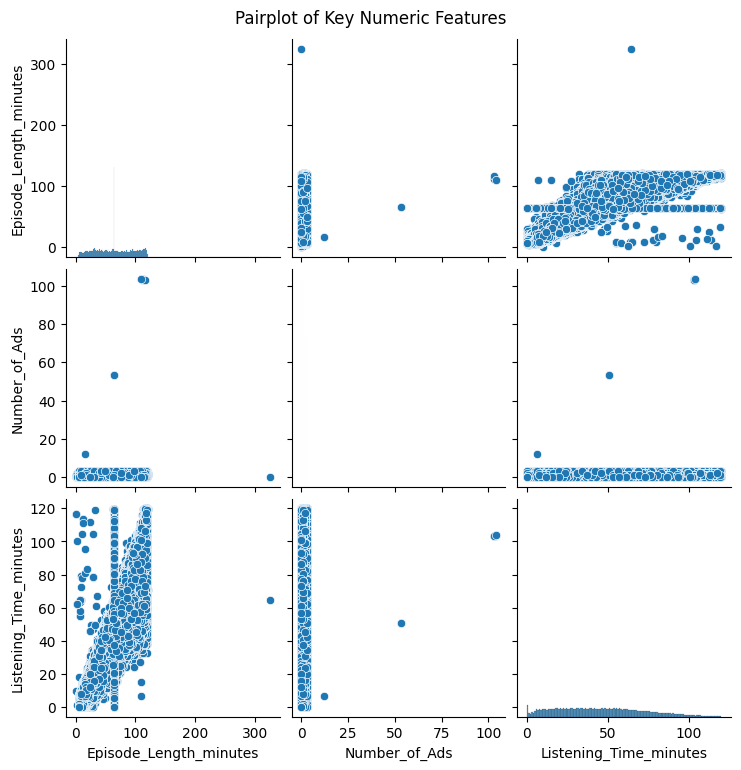

In [27]:
# Scatter + hist matrix for a few numeric features
sns.pairplot(df_train[['Episode_Length_minutes','Genre','Publication_Day','Publication_Time','Number_of_Ads','Episode_Sentiment','Listening_Time_minutes']])
plt.suptitle('Pairplot of Key Numeric Features', y=1.02)
plt.show()

# Step-05 Model Selection

In [28]:
X = df_train_clean.drop(['Listening_Time_minutes'], axis=1)
y = df_train_clean['Listening_Time_minutes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
}

# Step-06 Model Fitting and Prediction

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 29
[LightGBM] [Info] Start training from score 45.447808


In [41]:
X_test = X_test.head(25000)
df_train = df_train_clean.head(250000)

In [42]:
y_pred_lr = models['LinearRegression'].predict(df_test)
y_pred_rf = models['RandomForest'].predict(df_test)

# Step-07 Model Evaluation

In [46]:
print("______________Linear Regression_____________________")
lr_rmse = root_mean_squared_error(df_train['Listening_Time_minutes'], y_pred_lr)
print(f'Linear Regression RMSE: {lr_rmse:.4f}')
lr_r2 = r2_score(df_train['Listening_Time_minutes'], y_pred_lr)
print(f'Linear Regression R2: {lr_r2:.4f}')

print("______________Random Forest_____________________")
rf_rmse = root_mean_squared_error(df_train['Listening_Time_minutes'], y_pred_rf)
print(f'Random Forest RMSE: {rf_rmse:.4f}')
rf_r2 = r2_score(df_train['Listening_Time_minutes'], y_pred_rf)
print(f'Random Forest R2: {rf_r2:.4f}')


______________Linear Regression_____________________
Linear Regression RMSE: 118300.5892
Linear Regression R2: -19048722.9801
______________Random Forest_____________________
Random Forest RMSE: 38.8917
Random Forest R2: -1.0588
